In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
sys.path.append("../../src")

import numpy as np
import matplotlib.pyplot as plt
from data.plot_light_curve import plot_curves

from config import *
from data.load_multi_array import load_multi_array

import glob
import os
import random


In [5]:
REAL_DATA = "C:/Users/Kyselica/Desktop/kyselica/classification_of_light_curves/resources/"
REAL_LABELS = ["cz3", "titan", "falcon9", "atlasv", "h2a", "globalstar"]

real_X = np.loadtxt(f"{REAL_DATA}/train_x.np")
real_Y = np.loadtxt(f"{REAL_DATA}/train_y.np").astype(dtype=np.int32)

In [91]:
synthetic_X = []
synthetic_Y = []

for file in glob.iglob(f"{DATA_PATH}/*multi_array*"):
    data = load_multi_array(file)
    data = -2.5 * np.log10(data)
    label = os.path.split(file)[1].split("_")[0]
    labels = [REAL_LABELS.index(label.lower())]* len(data)
    synthetic_X.append(data)
    synthetic_Y.append(labels)

synthetic_X = np.array(synthetic_X)
synthetic_Y = np.array(synthetic_Y)

C:\Users\Kyselica\AppData\Local\Temp\ipykernel_19292\1322157447.py:6: RuntimeWarning: divide by zero encountered in log10
  data = -2.5 * np.log10(data)


In [93]:
data = {}

for i, label in enumerate(REAL_LABELS):
    if label == "titan": continue

    data[label] = {
        "real": real_X[real_Y == i],
        "synthetic": synthetic_X[synthetic_Y == i]
    }

In [5]:
PHASE_ANGLE_START = 0
PHASE_ANGLE_END = 120
PHASE_ANGLE_NUM_STEPS = 40

OBS_ANGLE_START = 0
OBS_ANGLE_END = 90
OBS_ANGLE_NUM_STEPS = 45

phase_angles = np.linspace(PHASE_ANGLE_START, PHASE_ANGLE_END, num=PHASE_ANGLE_NUM_STEPS, endpoint=True)
obs_angles = np.linspace(OBS_ANGLE_START, OBS_ANGLE_END, num=OBS_ANGLE_NUM_STEPS, endpoint=True)

def get_angels(data, phs, obs):
    row = phs//3
    col = obs//2
    return data[row*OBS_ANGLE_NUM_STEPS + col]    

697 1800


Text(0.5, 1.0, 'synthetis')

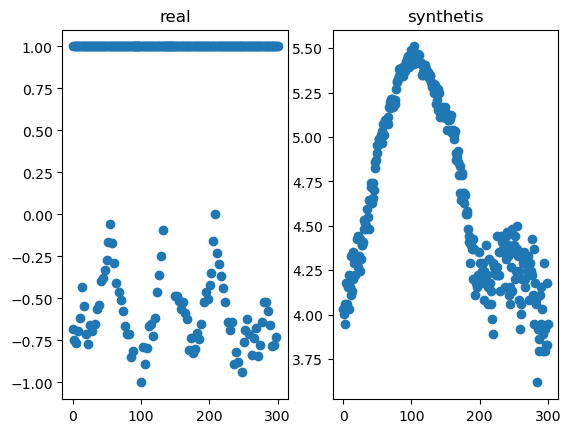

In [105]:
name = "globalstar"
# type = "synthetic"
phs = 45
obs = 45

# if type == "synthetic":
# d1 = get_angels(data[name]["synthetic"][0], phs, obs)
i = phs//3 * OBS_ANGLE_NUM_STEPS + obs//2
print(i, len(data[name]["synthetic"]))
d1 = data[name]["synthetic"][i]
# else:
d2 = data[name]["real"][random.randrange(len(data[name]["real"]))]


plt.subplot(1, 2, 1)
plt.scatter(np.linspace(0,300,300),-d2)
plt.title("real")

plt.subplot(1, 2, 2)
plt.scatter(np.linspace(0,300,300),-d1)
plt.title("synthetis")

In [7]:
from nn.dataset import AugmentedBalancedDataset

dataset_args = {
    "max_noise": 0.05, 
    "num_gaps": 2, "min_gap_len": 5,
    "max_gap_len": 10, 
    "gap_prob": 0.01, 
    "use_original_data": True, 
    "min_num_examples": 1800*2
}

# train_set, val_set = create_datasets(new_data, LABELS, validation_split=0.1, output_folder=None, 
#                                 dataset_class=NetDataset, aditional_dataset_args={})

train_set = AugmentedBalancedDataset(synthetic_X, synthetic_Y, **dataset_args)

c:\Users\Kyselica\Documents\programs\anaconda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


h2a


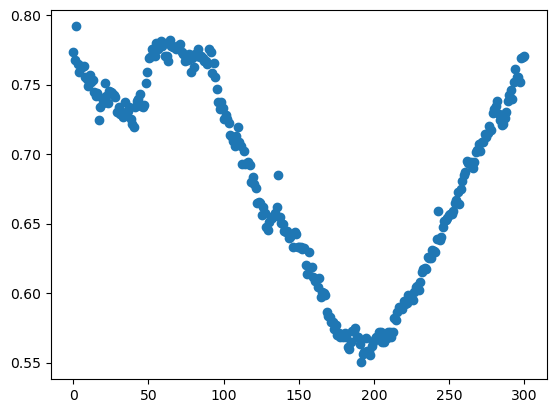

In [17]:
i = random.randrange(len(train_set))
x, y = train_set[i]
plt.scatter(np.linspace(0,300,300),x)
# phs = (i // 45)
# obs = i % 45 * 2
print(REAL_LABELS[y])

# pozriet normalizaciu

# iba odtiene sivej pri generovani

# Delta

# 2) overit natrenovanu ako vyhodnoti 


# 1) report kriviek
# - pre realnu s rovnakymi nastaveniami



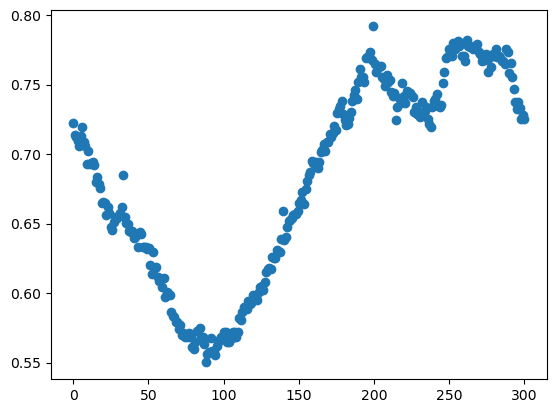

In [18]:
x = train_set._roll(x)
plt.scatter(np.linspace(0,300,300),x)


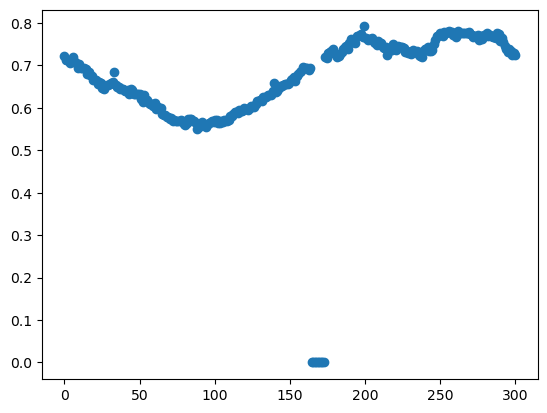

In [35]:
x = train_set._add_gap(x)
plt.scatter(np.linspace(0,300,300),x)

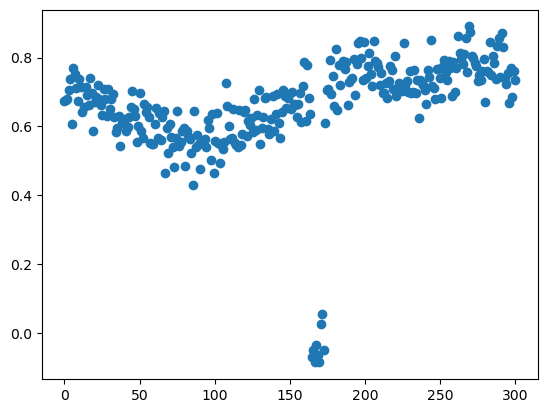

In [36]:
x = train_set._add_noise(x)
plt.scatter(np.linspace(0,300,300),x)

In [6]:
from src.data import load_multi_array

ModuleNotFoundError: No module named 'src'